In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from textblob import TextBlob
import re

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger') # if needed

[nltk_data] Downloading package punkt to C:\Users\foziya
[nltk_data]     fetudin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\foziya
[nltk_data]     fetudin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\foziya
[nltk_data]     fetudin\AppData\Roaming\nltk_data...


True

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [7]:

file_path = '../data/raw_analyst_ratings.csv' 

try:
    df_news = pd.read_csv(file_path, engine='python')

    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    print("Please check the file path and ensure the dataset is in the 'data' folder.")
   
    df_news = pd.DataFrame() 

Dataset loaded successfully!


In [8]:

if not df_news.empty:
    print("--- First 5 Rows ---")
    display(df_news.head()) 

    print("\n--- Dataset Shape ---")
    print(f"Rows: {df_news.shape[0]}, Columns: {df_news.shape[1]}")

    print("\n--- Column Names ---")
    print(list(df_news.columns))

    print("\n--- Data Types and Non-Null Counts ---")
    df_news.info()
else:
    print("DataFrame is empty. Cannot perform initial data understanding.")

--- First 5 Rows ---


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A



--- Dataset Shape ---
Rows: 1407328, Columns: 6

--- Column Names ---
['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']

--- Data Types and Non-Null Counts ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [9]:

if not df_news.empty:
    print("\n--- Descriptive Statistics (Numerical Columns) ---")
    display(df_news.describe())

    print("\n--- Descriptive Statistics (Categorical/Object Columns) ---")
    display(df_news.describe(include=['object', 'category']))
else:
    print("DataFrame is empty. Cannot perform descriptive statistics.")


--- Descriptive Statistics (Numerical Columns) ---


,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06



--- Descriptive Statistics (Categorical/Object Columns) ---


,headline,url,publisher,date,stock
count,1407328,1407328,1407328,1407328,1407328
unique,845770,883429,1034,39957,6204
top,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,5449,1704,228373,1766,3333


In [10]:

if not df_news.empty:
    print("\n--- Missing Values per Column (Count) ---")
    missing_values_count = df_news.isnull().sum()
    print(missing_values_count[missing_values_count > 0]) # Show only columns with missing values

    print("\n--- Missing Values per Column (Percentage) ---")
    missing_values_percent = (df_news.isnull().sum() / len(df_news)) * 100
    print(missing_values_percent[missing_values_percent > 0].sort_values(ascending=False))
else:
    print("DataFrame is empty. Cannot check for missing values.")


--- Missing Values per Column (Count) ---
Series([], dtype: int64)

--- Missing Values per Column (Percentage) ---
Series([], dtype: float64)


In [11]:

if not df_news.empty:
    num_duplicates = df_news.duplicated().sum()
    print(f"\n--- Number of Duplicate Rows ---")
    print(num_duplicates)

    if num_duplicates > 0:
        print("\n--- Showing Duplicate Rows (first 5 if many) ---")
        pass 
else:
    print("DataFrame is empty. Cannot check for duplicates.")


--- Number of Duplicate Rows ---
0


In [12]:

if not df_news.empty and 'date' in df_news.columns:
    print("\n--- Date Column Analysis ---")
    print(f"Original 'date' column data type: {df_news['date'].dtype}")
    print(f"Example date values: {df_news['date'].head(3).tolist()}")

    original_dates_sample = df_news['date'].head().copy() 
    try:
        df_news['date_dt'] = pd.to_datetime(df_news['date'], errors='coerce')
        
        print(f"\nNew 'date_dt' column data type: {df_news['date_dt'].dtype}")

        if df_news['date_dt'].dt.tz is not None:
            print(f"Timezone detected: {df_news['date_dt'].dt.tz}")
          
        else:
            print("No timezone information automatically detected in 'date_dt'. It's timezone-naive.")
            print("The challenge mentions UTC-4. You may need to localize it.")
            print("Example to localize to UTC-4 (Etc/GMT+4) and then convert to UTC:")
            print("# df_news['date_dt'] = df_news['date_dt'].dt.tz_localize('Etc/GMT+4', ambiguous='infer')")
            print("# df_news['date_dt'] = df_news['date_dt'].dt.tz_convert('UTC')")


        print("\n--- Date Conversion Quick Check ---")
        print("Original 'date' values:")
        print(original_dates_sample)
        print("\nConverted 'date_dt' values (first 5):")
        display(df_news[['date', 'date_dt']].head())

        
        nat_count = df_news['date_dt'].isnull().sum()
        original_date_null_count = df_news['date'].isnull().sum()
        print(f"\nNumber of NaT values in 'date_dt': {nat_count}")
        if nat_count > original_date_null_count:
            print(f"Warning: {nat_count - original_date_null_count} date strings could not be parsed and resulted in NaT.")
           


    except Exception as e:
        print(f"Error converting 'date' column: {e}")
        
        if 'date_dt' not in df_news.columns:
             df_news['date_dt'] = pd.NaT

elif 'date' not in df_news.columns:
    print("Error: 'date' column not found in DataFrame.")
    
    df_news['date_dt'] = pd.NaT
else:
    print("DataFrame is empty. Cannot process date column.")


--- Date Column Analysis ---
Original 'date' column data type: object
Example date values: ['2020-06-05 10:30:54-04:00', '2020-06-03 10:45:20-04:00', '2020-05-26 04:30:07-04:00']

New 'date_dt' column data type: datetime64[ns, UTC-04:00]
Timezone detected: UTC-04:00

--- Date Conversion Quick Check ---
Original 'date' values:
0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
Name: date, dtype: object

Converted 'date_dt' values (first 5):


,date,date_dt
0,2020-06-05 10:30:54-04:00,2020-06-05 10:30:54-04:00
1,2020-06-03 10:45:20-04:00,2020-06-03 10:45:20-04:00
2,2020-05-26 04:30:07-04:00,2020-05-26 04:30:07-04:00
3,2020-05-22 12:45:06-04:00,2020-05-22 12:45:06-04:00
4,2020-05-22 11:38:59-04:00,2020-05-22 11:38:59-04:00



Number of NaT values in 'date_dt': 1351341



--- Headline Length Analysis ---

Descriptive Statistics for Headline Length:


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

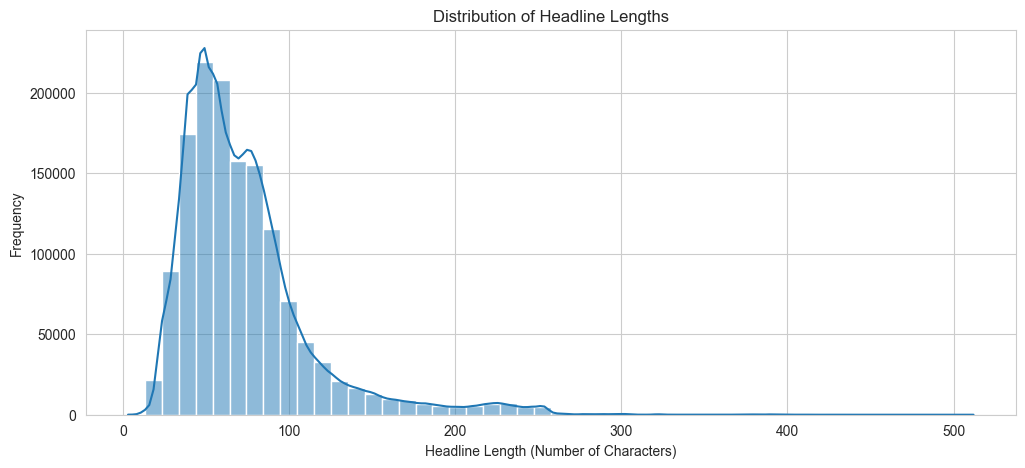

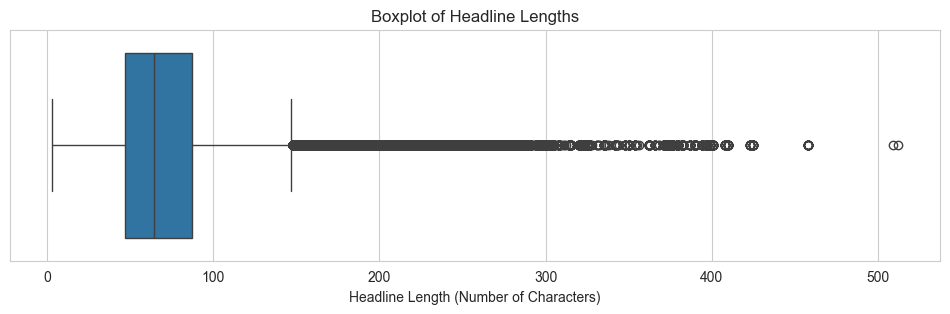

In [13]:

if not df_news.empty and 'headline' in df_news.columns:
    print("\n--- Headline Length Analysis ---")
   
    df_news['headline'] = df_news['headline'].astype(str).fillna('')
    df_news['headline_length'] = df_news['headline'].str.len()

    print("\nDescriptive Statistics for Headline Length:")
    display(df_news['headline_length'].describe())

    plt.figure(figsize=(12, 5))
    sns.histplot(df_news['headline_length'], bins=50, kde=True)
    plt.title('Distribution of Headline Lengths')
    plt.xlabel('Headline Length (Number of Characters)')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(12, 3))
    sns.boxplot(x=df_news['headline_length'])
    plt.title('Boxplot of Headline Lengths')
    plt.xlabel('Headline Length (Number of Characters)')
    plt.show()
else:
    print("DataFrame is empty or 'headline' column missing. Skipping headline length analysis.")


--- Publisher Analysis ---

Top 10 Most Active Publishers:


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

C:\Users\foziya fetudin\AppData\Local\Temp\ipykernel_10596\1265723360.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=publisher_counts.head(N).index, x=publisher_counts.head(N).values, palette='viridis')


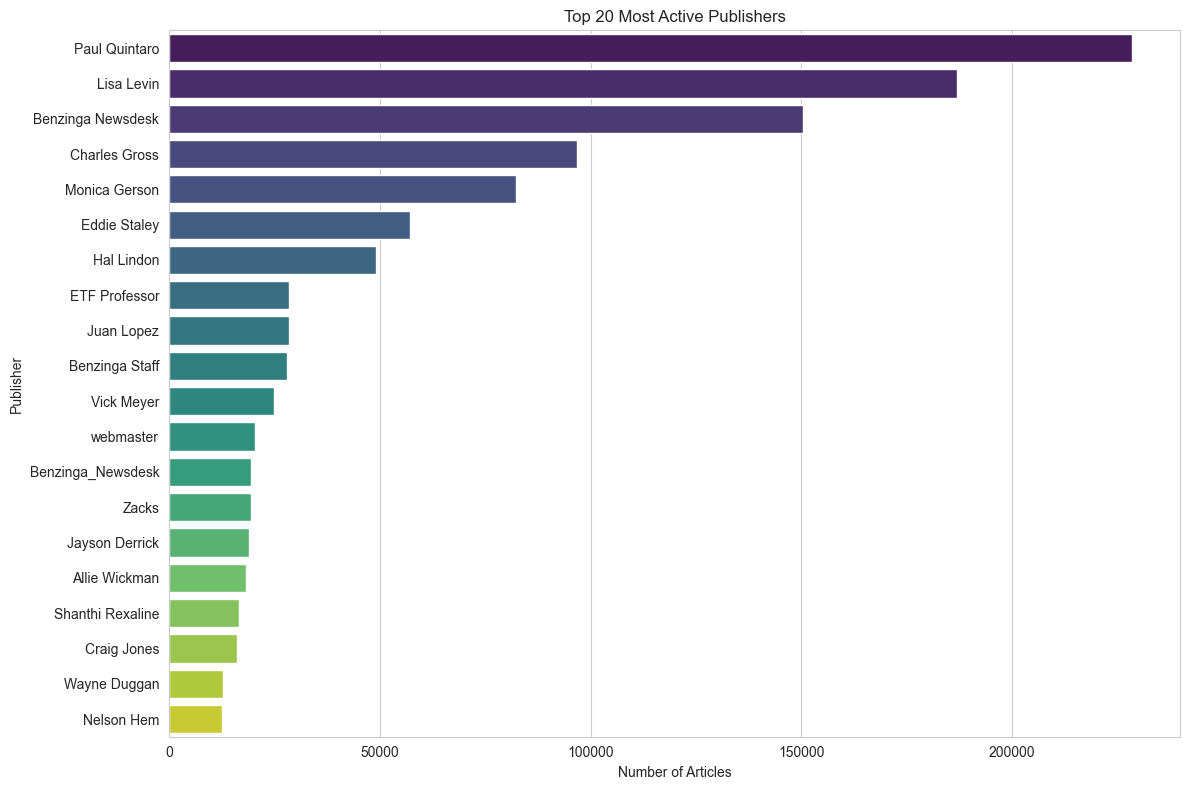


--- Publisher Domain Analysis ---
Number of publishers that might be emails: 8088

Top 10 Publisher Domains (from email-like publishers):


publisher_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64

C:\Users\foziya fetudin\AppData\Local\Temp\ipykernel_10596\1265723360.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=domain_counts.head(N).index, x=domain_counts.head(N).values, palette='mako')


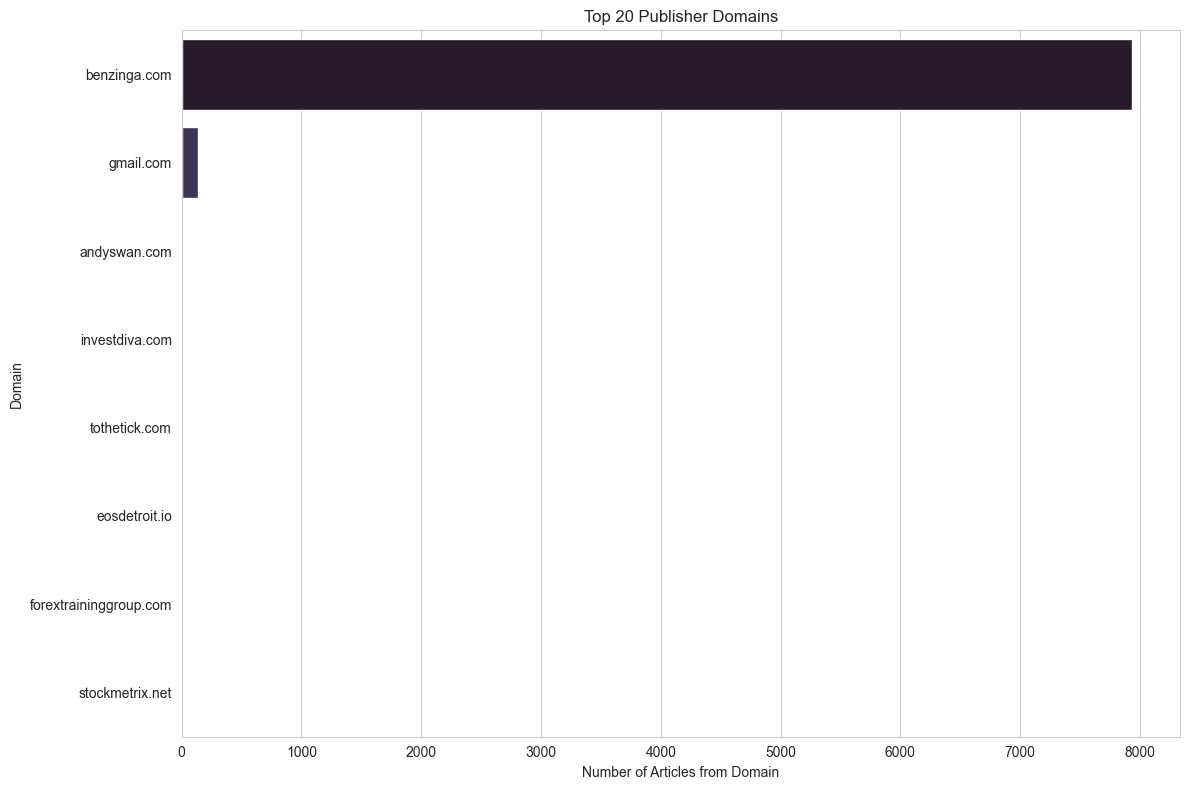

In [14]:
if not df_news.empty and 'publisher' in df_news.columns:
    print("\n--- Publisher Analysis ---")
    df_news['publisher'] = df_news['publisher'].astype(str).fillna('Unknown')

    publisher_counts = df_news['publisher'].value_counts()
    print("\nTop 10 Most Active Publishers:")
    display(publisher_counts.head(10))

    N = 20 
    plt.figure(figsize=(12, 8))
    sns.barplot(y=publisher_counts.head(N).index, x=publisher_counts.head(N).values, palette='viridis')
    plt.title(f'Top {N} Most Active Publishers')
    plt.xlabel('Number of Articles')
    plt.ylabel('Publisher')
    plt.tight_layout()
    plt.show()

    print("\n--- Publisher Domain Analysis ---")
    
    df_news['is_email_publisher'] = df_news['publisher'].str.contains('@', na=False)
    email_publishers_count = df_news['is_email_publisher'].sum()
    print(f"Number of publishers that might be emails: {email_publishers_count}")

    if email_publishers_count > 0:
        
        df_news['publisher_domain'] = df_news['publisher'].apply(
            lambda x: x.split('@')[1] if isinstance(x, str) and '@' in x and len(x.split('@')) > 1 else None
        )
        domain_counts = df_news['publisher_domain'].value_counts()
        print("\nTop 10 Publisher Domains (from email-like publishers):")
        display(domain_counts.head(10))

        plt.figure(figsize=(12, 8))
        sns.barplot(y=domain_counts.head(N).index, x=domain_counts.head(N).values, palette='mako')
        plt.title(f'Top {N} Publisher Domains')
        plt.xlabel('Number of Articles from Domain')
        plt.ylabel('Domain')
        plt.tight_layout()
        plt.show()
    else:
        print("No email-like publishers found for domain analysis.")

else:
    print("DataFrame is empty or 'publisher' column missing. Skipping publisher analysis.")


--- Publication Date Trends Analysis ---


C:\Users\foziya fetudin\AppData\Local\Temp\ipykernel_10596\2365603330.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_news_dated, x='year', palette='Set2')


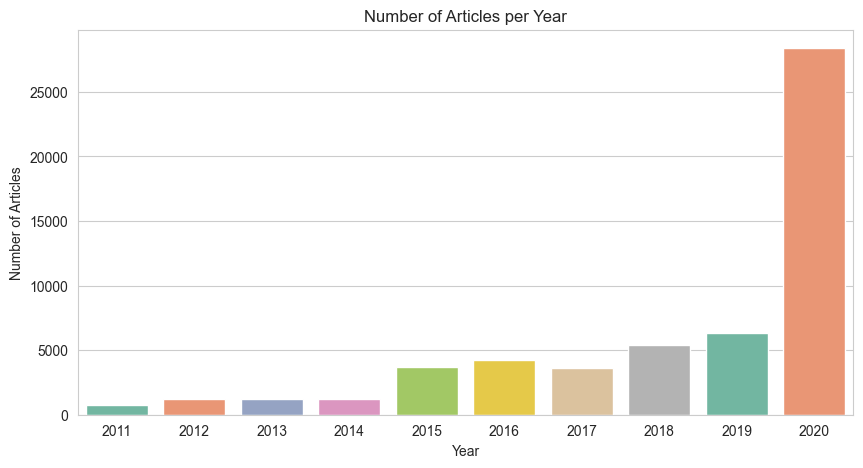

C:\Users\foziya fetudin\AppData\Local\Temp\ipykernel_10596\2365603330.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_news_dated, x='month', palette='Set2', order=range(1,13))


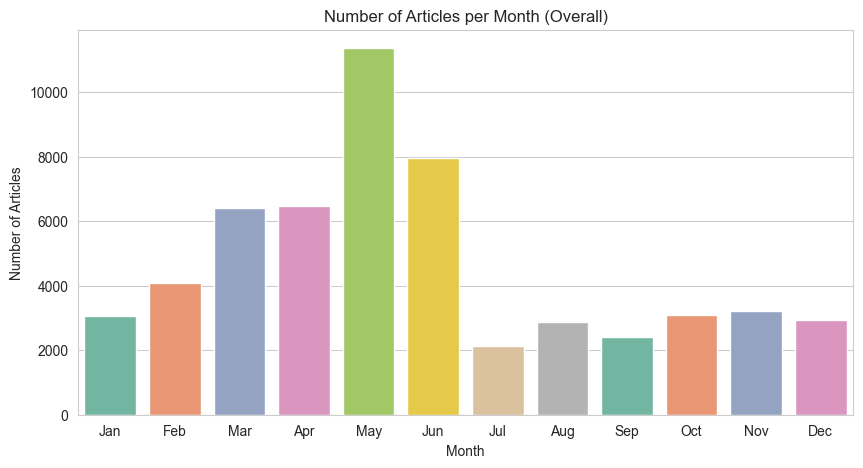

C:\Users\foziya fetudin\AppData\Local\Temp\ipykernel_10596\2365603330.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_news_dated, x='day_of_week', palette='Set2', order=day_order)


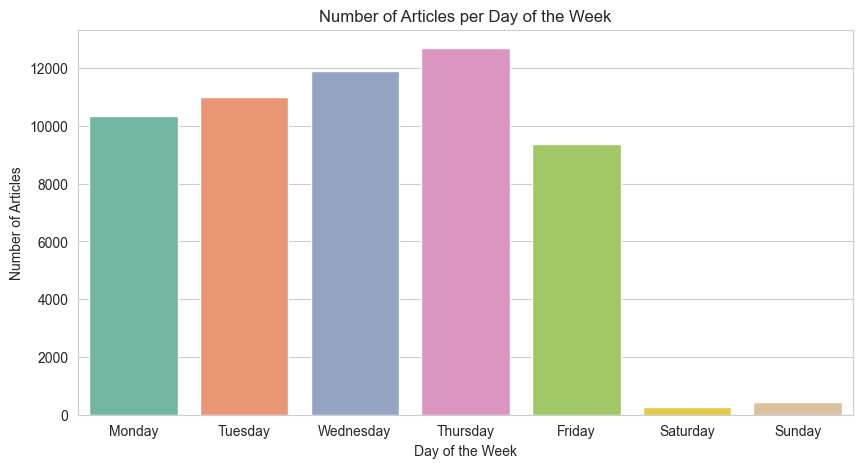

C:\Users\foziya fetudin\AppData\Local\Temp\ipykernel_10596\2365603330.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_news_dated, x='hour', palette='Set2', order=range(0,24))


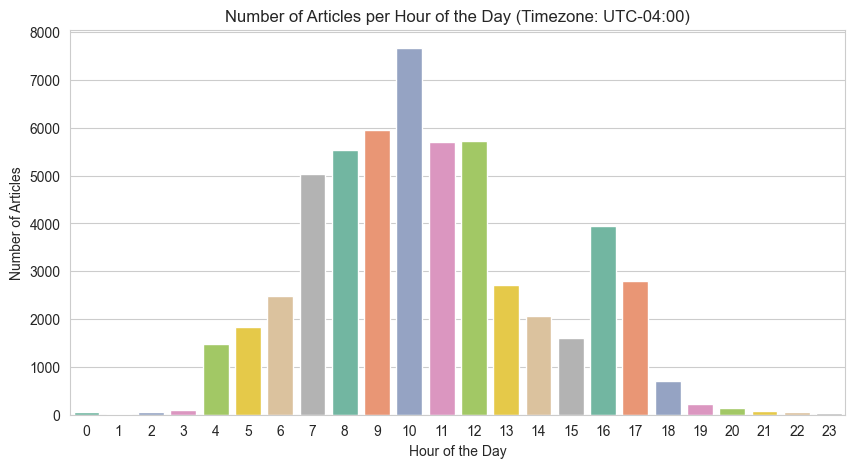

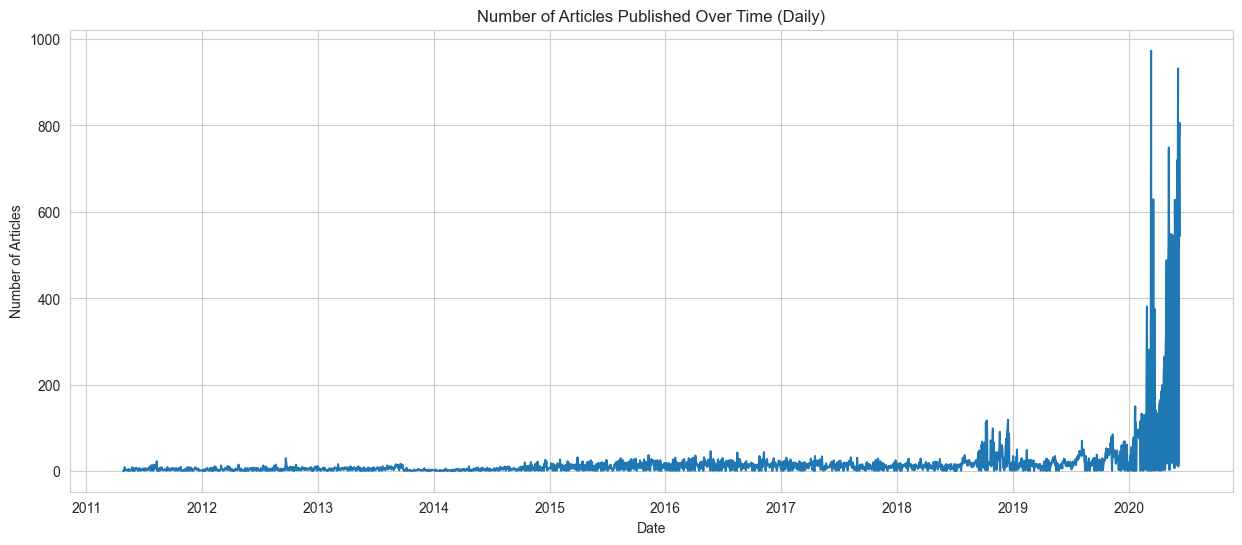

In [15]:

if not df_news.empty and 'date_dt' in df_news.columns and pd.api.types.is_datetime64_any_dtype(df_news['date_dt']):
    print("\n--- Publication Date Trends Analysis ---")
    df_news_dated = df_news.dropna(subset=['date_dt']).copy() # Use a copy for modifications

    df_news_dated['year'] = df_news_dated['date_dt'].dt.year
    df_news_dated['month'] = df_news_dated['date_dt'].dt.month
    df_news_dated['day_of_week'] = df_news_dated['date_dt'].dt.day_name() # Monday=0, Sunday=6 if .dayofweek
    df_news_dated['hour'] = df_news_dated['date_dt'].dt.hour
    df_news_dated['date_only'] = df_news_dated['date_dt'].dt.date # For daily counts


    plt.figure(figsize=(10,5))
    sns.countplot(data=df_news_dated, x='year', palette='Set2')
    plt.title('Number of Articles per Year')
    plt.ylabel('Number of Articles')
    plt.xlabel('Year')
    plt.show()

    
    plt.figure(figsize=(10,5))
    sns.countplot(data=df_news_dated, x='month', palette='Set2', order=range(1,13))
    plt.title('Number of Articles per Month (Overall)')
    plt.xticks(ticks=range(0,12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    plt.ylabel('Number of Articles')
    plt.xlabel('Month')
    plt.show()

    
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    plt.figure(figsize=(10,5))
    sns.countplot(data=df_news_dated, x='day_of_week', palette='Set2', order=day_order)
    plt.title('Number of Articles per Day of the Week')
    plt.ylabel('Number of Articles')
    plt.xlabel('Day of the Week')
    plt.show()

    
    plt.figure(figsize=(10,5))
    sns.countplot(data=df_news_dated, x='hour', palette='Set2', order=range(0,24))
    plt.title('Number of Articles per Hour of the Day (Timezone: ' + str(df_news_dated['date_dt'].dt.tz) + ')')
    plt.ylabel('Number of Articles')
    plt.xlabel('Hour of the Day')
    plt.show()

    
    articles_per_day = df_news_dated.groupby('date_only').size()
    plt.figure(figsize=(15,6))
    articles_per_day.plot(kind='line')
    plt.title('Number of Articles Published Over Time (Daily)')
    plt.ylabel('Number of Articles')
    plt.xlabel('Date')
    plt.show()

else:
    print("DataFrame is empty, 'date_dt' column missing, or not datetime type. Skipping publication date trends analysis.")


--- Stock Symbol Analysis ---

Number of unique stock symbols: 6204

Top 10 Most Mentioned Stocks:


stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
NFLX    3028
M       3025
EBAY    3018
GILD    2968
VZ      2966
Name: count, dtype: int64

C:\Users\foziya fetudin\AppData\Local\Temp\ipykernel_10596\3394327771.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=stock_counts.head(N).index, x=stock_counts.head(N).values, palette='coolwarm')


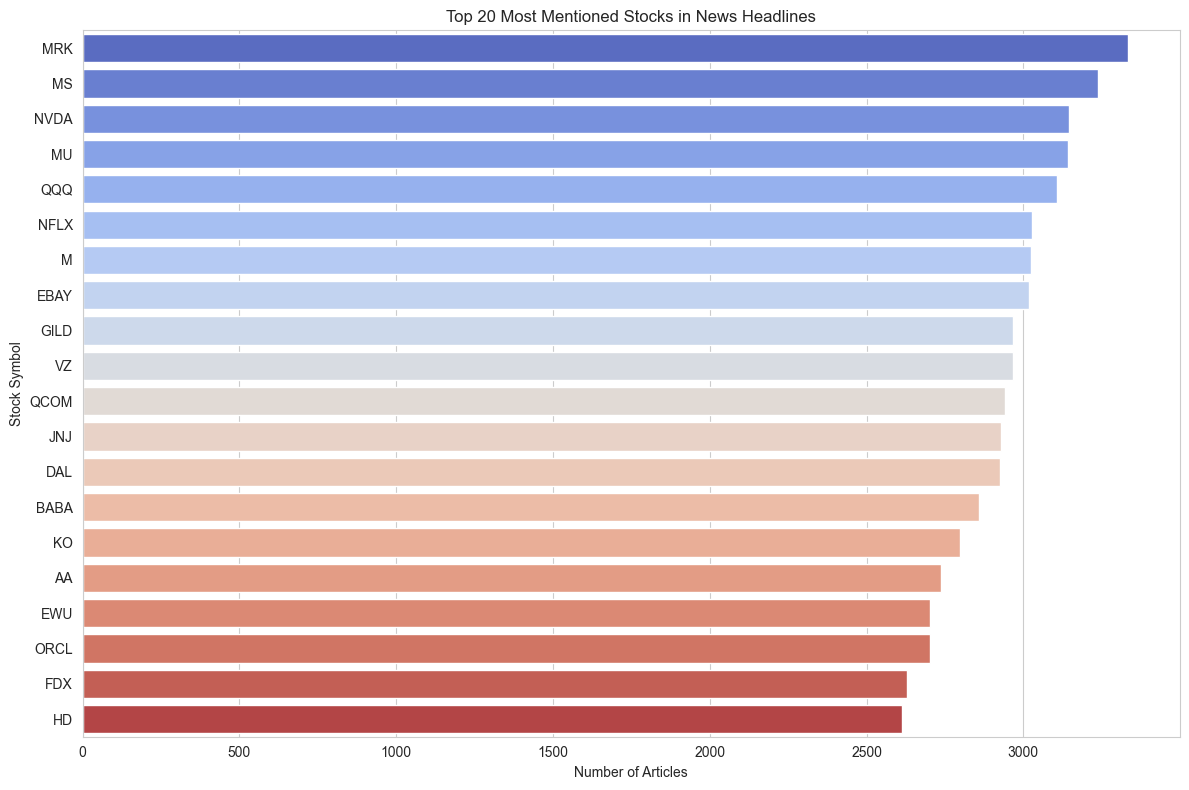

In [16]:

if not df_news.empty and 'stock' in df_news.columns:
    print("\n--- Stock Symbol Analysis ---")
    df_news['stock'] = df_news['stock'].astype(str).fillna('Unknown') # Ensure string and fill NA

    stock_counts = df_news['stock'].value_counts()
    print(f"\nNumber of unique stock symbols: {df_news['stock'].nunique()}")
    print("\nTop 10 Most Mentioned Stocks:")
    display(stock_counts.head(10))

    N = 20 
    plt.figure(figsize=(12, 8))
    sns.barplot(y=stock_counts.head(N).index, x=stock_counts.head(N).values, palette='coolwarm')
    plt.title(f'Top {N} Most Mentioned Stocks in News Headlines')
    plt.xlabel('Number of Articles')
    plt.ylabel('Stock Symbol')
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame is empty or 'stock' column missing. Skipping stock symbol analysis.")


--- Basic Text Analysis: Common Keywords in Headlines ---

Most Common Words (Top 30 from sample):
to: 3134
of: 1882
for: 1850
the: 1744
on: 1697
in: 1678
stocks: 1159
alcoa: 1125
vs: 1071
q: 1062
and: 950
est: 898
m: 893
eps: 856
from: 839
earnings: 811
shares: 758
market: 737
b: 715
reports: 710
a: 691
with: 666
update: 554
sales: 538
at: 513
agilent: 487
auto: 485
announces: 480
buy: 475
abbvie: 474


C:\Users\foziya fetudin\AppData\Local\Temp\ipykernel_10596\2787535582.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_words_df, x='count', y='word', palette='Spectral')


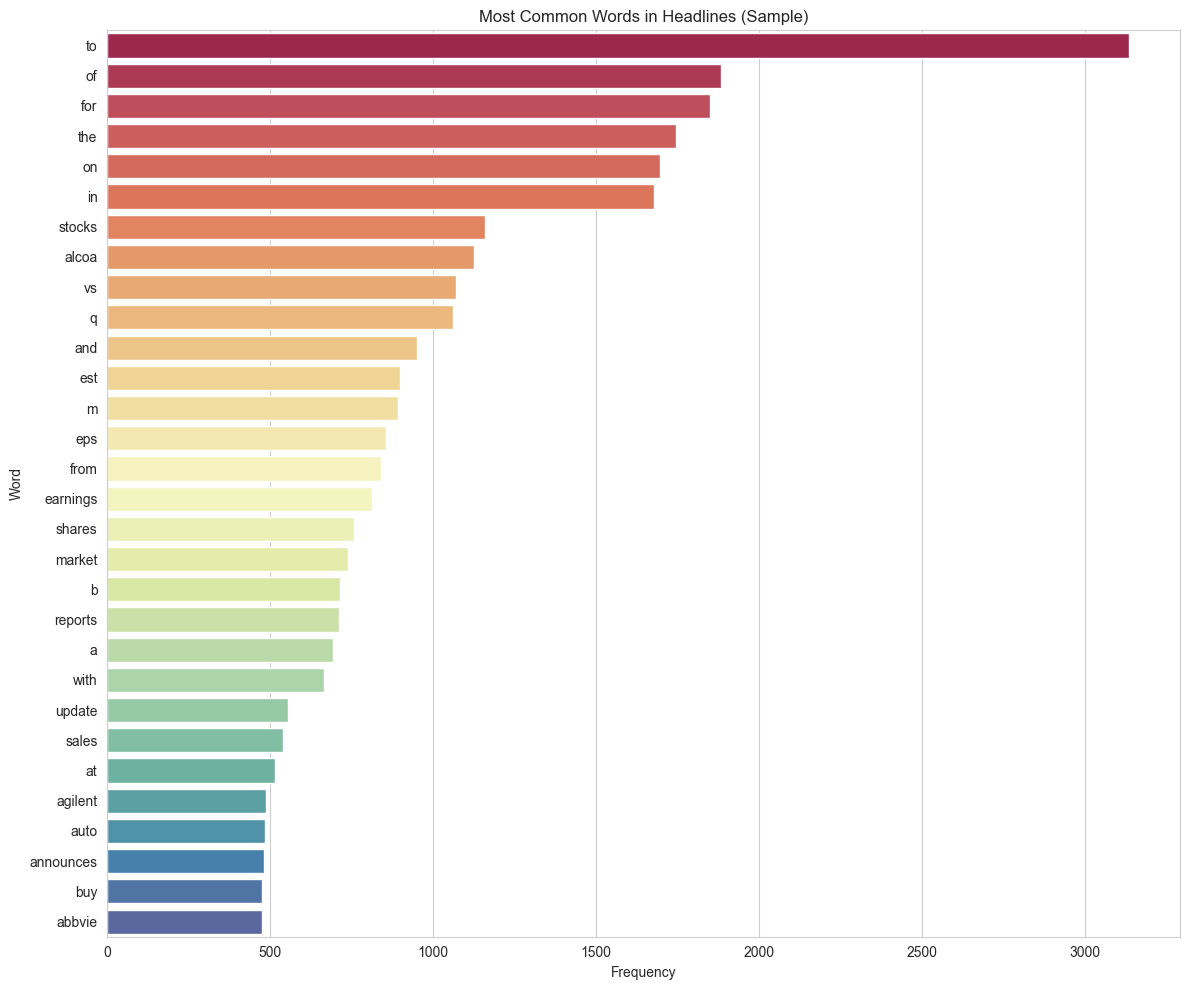

In [17]:

from collections import Counter
import re 

if not df_news.empty and 'headline' in df_news.columns:
    print("\n--- Basic Text Analysis: Common Keywords in Headlines ---")

    def clean_text(text):
        text = text.lower() 
        text = re.sub(r'[^\w\s]', '', text) 
        text = re.sub(r'\d+', '', text) 
        return text

    sample_size = min(10000, len(df_news)) 
    corpus = " ".join(df_news['headline'].head(sample_size).apply(clean_text))

    words = corpus.split()

    word_counts = Counter(words)
    most_common_words = word_counts.most_common(30)

    print("\nMost Common Words (Top 30 from sample):")
    for word, count in most_common_words:
        print(f"{word}: {count}")

    common_words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])
    plt.figure(figsize=(12,10))
    sns.barplot(data=common_words_df, x='count', y='word', palette='Spectral')
    plt.title('Most Common Words in Headlines (Sample)')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.tight_layout()
    plt.show()

else:
    print("DataFrame is empty or 'headline' column missing. Skipping basic text analysis.")